In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/saved_model/my_modelBB50_AN')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/AN_data/BB50.csv")
time = df['time'].values
AN = df['ammonia nitrogen'].values
df

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

,time,ammonia nitrogen
0,0.000000,0.161751
1,0.002903,0.006520
2,0.005805,0.006520
3,0.008708,0.099658
4,0.011611,0.285936
...,...,...
290,0.986938,0.006520
291,0.989842,0.028252
292,0.993470,0.040671
293,0.996373,0.158646


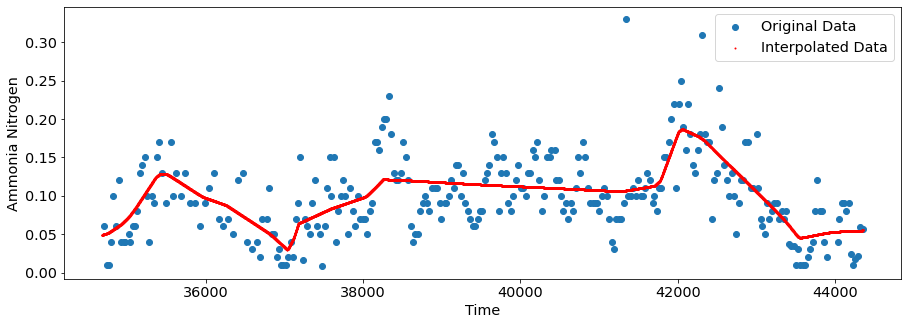

313/313 [==============================] - 0s 333us/step - loss: 2.7907e-16
['loss']


In [2]:
#Transform the normalized scale to real scale
AN_min = 0.0079
AN_max = 0.33
time_min = 34710.00        
time_max = 44356.41         

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(AN_max - AN_min) + AN_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, AN*(AN_max - AN_min) + AN_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Ammonia Nitrogen')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [3]:
interpolation = model.predict([0.078682095
,0.084798358
,0.097445546
,0.10376914
,0.110092734
,0.116519993
,0.122636256
,0.12895985
,0.135283444
,0.141607038
,0.147930632
,0.154357891
,0.160474154
,0.166797748
,0.173121342
,0.179444936
,0.18576853
,0.19219579
,0.198415718
,0.211062906
,0.955692008
,0.958801973
,0.962015602
])
interpolation

array([[0.37471884],
       [0.36920086],
       [0.3446841 ],
       [0.3320966 ],
       [0.3195038 ],
       [0.30671874],
       [0.29471925],
       [0.28314877],
       [0.27538162],
       [0.26847482],
       [0.26156807],
       [0.25467393],
       [0.2480486 ],
       [0.23535073],
       [0.22265285],
       [0.20995498],
       [0.19725713],
       [0.18435115],
       [0.17186143],
       [0.14638017],
       [0.13768677],
       [0.1391317 ],
       [0.14030308]], dtype=float32)